# the 6th homework: regular expressions

In [1]:
import re
import matplotlib.pyplot as plt

1. Parse the references file using regular expressions and write all ftp links into the ftps file (5 points)

In [2]:
# download a file with ftp links
!wget https://raw.githubusercontent.com/Serfentum/bf_course/master/15.re/references

--2022-11-17 17:45:05--  https://raw.githubusercontent.com/Serfentum/bf_course/master/15.re/references
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1206044 (1.1M) [text/plain]
Saving to: ‘references’

references          100%[===================>]   1.15M  --.-KB/s    in 0.05s   

2022-11-17 17:45:06 (21.2 MB/s) - ‘references’ saved [1206044/1206044]



In [3]:
# read the whole file with links
with open('/content/references') as ref:
  ref_read = ref.read()

# create a pattern to retrieve all links
pattern_ref = r'ftp\.[./#\w]*'

# write the result into a output file
with open('ftps', 'w') as ftps:
  print(*re.findall(pattern_ref, ref_read), file=ftps, sep = '\n')

In [15]:
re.findall(pattern_ref, ref_read)[:10]

['ftp.sra.ebi.ac.uk/vol1/fastq/ERR106/001/ERR1063831/ERR1063831_1.fastq.gz',
 'ftp.sra.ebi.ac.uk/vol1/fastq/ERR106/001/ERR1063831/ERR1063831_2.fastq.gz',
 'ftp.sra.ebi.ac.uk/vol1/fastq/ERR106/001/ERR1063831/ERR1063831_1.fastq.gz',
 'ftp.sra.ebi.ac.uk/vol1/fastq/ERR106/001/ERR1063831/ERR1063831_2.fastq.gz',
 'ftp.sra.ebi.ac.uk/vol1/ERA524/ERA524472/ERR1063831.md5',
 'ftp.sra.ebi.ac.uk/vol1/ERA524/ERA524472/cram/17150_3#49.cram',
 'ftp.sra.ebi.ac.uk/vol1/ERA524/ERA524472/ERR1063831.md5',
 'ftp.sra.ebi.ac.uk/vol1/ERA524/ERA524472/cram/17150_3#49.cram',
 'ftp.sra.ebi.ac.uk/vol1/fastq/ERR106/002/ERR1063832/ERR1063832_1.fastq.gz',
 'ftp.sra.ebi.ac.uk/vol1/fastq/ERR106/002/ERR1063832/ERR1063832_2.fastq.gz']

2. Extract all numbers (consisting of only digits) from the story 2430 A.D. (5 points)

In [4]:
# download a file with the story
!wget https://raw.githubusercontent.com/Serfentum/bf_course/master/15.re/2430AD

--2022-11-17 17:45:35--  https://raw.githubusercontent.com/Serfentum/bf_course/master/15.re/2430AD
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16759 (16K) [text/plain]
Saving to: ‘2430AD’

2430AD              100%[===================>]  16.37K  --.-KB/s    in 0.001s  

2022-11-17 17:45:35 (18.0 MB/s) - ‘2430AD’ saved [16759/16759]



In [5]:
# read the whole story
with open('/content/2430AD') as tale:
  tale_read = tale.read()

# create a pattern to retrieve all numbers
pattern_tale = r'([0-9]+)(\.[0-9]+)?'

# write the result into a output file
with open('task2', 'w') as numbers:
  print(*[i[0] for i in re.findall(pattern_tale, tale_read)], file=numbers)

In [16]:
[i[0] for i in re.findall(pattern_tale, tale_read)]

['2430', '1969', '2430', '2430', '57', '57', '1970', '3', '35', '460', '2430']

3. From the same story, extract all the words containing the 'a' letter ignoring the case (5 points)

In [6]:
# create a pattern to retrieve all words with the 'a' letter
pattern_tale_Aa = r'\w*[aA]\w*'

# write the result into a output file
with open('task3', 'w') as Aa:
  print(*re.findall(pattern_tale_Aa, tale_read), file=Aa)

In [17]:
re.findall(pattern_tale_Aa, tale_read)[:10]

['A', 'and', 'dawn', 'and', 'all', 'ache', 'have', 'a', 'nightmare', 'a']

4. Extract all exclamatory sentences from the story (5 points)

In [7]:
# create a pattern to retrieve all exclamatory sentences
pattern_tale_exclamation = r'[a-zA-Z \,]*!'

# write the result into a output file
with open('task4', 'w') as exclamation:
  print(*re.findall(pattern_tale_exclamation, 
                    tale_read), file=exclamation)

In [18]:
re.findall(pattern_tale_exclamation, tale_read)

['Yes!',
 'Literally!',
 ' There was once a time!',
 ' Centuries ago!',
 'Think, Cranwitz!',
 'If we succeed!']

5. Plot a histogram of the length distribution of unique words from the story (regarding a case) (5 points)

In [8]:
# create a pattern to retrieve all words
pattern_words = r"[a-zA-Z0-9-']+"

# find all words
all_words = re.findall(pattern_words, tale_read)
# unify them
all_words_lower = list(map(lambda x: x.lower(), all_words))
# create a set of unique words
all_words_unique = sorted(set(all_words_lower), key=len)

In [9]:
# for each of the word length count its frequency
length_frequency = {}

for i in range(len(all_words_unique[0]), len(all_words_unique[-1]) + 1):
  length_frequency[i] = len(list(filter(lambda x: len(x) == i, 
                                        all_words_unique))) / len(all_words_unique)

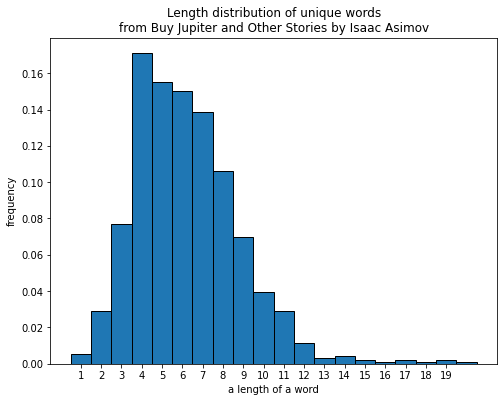

In [19]:
# plot the result
plt.figure(figsize=(8,6))
plt.bar(length_frequency.keys(), length_frequency.values(), 
        width=1, edgecolor='k')
plt.xticks(range(len(all_words_unique[0]), len(all_words_unique[-1])))
plt.title('Length distribution of unique words\nfrom Buy Jupiter and Other Stories by Isaac Asimov')
plt.xlabel('a length of a word')
plt.ylabel('frequency');

6. Add after each Russian vowel 'K + an uppercase vowel' (5 points)

In [13]:
# input your string to transform
desirable_string = input('Insert ur string: ')

# a list of Russian lower- and uppercase vowels
list_vowels = 'УЕАОЭЁЯИЮЫ'
list_vowels = list_vowels + list_vowels.lower()

# iterate over all vowels starting with the upper once
# since the added part contains a tail with a capital vowel
for i in list_vowels:
  desirable_string = re.sub(f'{i}', f'{i}К{i.upper()}', desirable_string)

print(desirable_string)

Insert ur string: Сделайте функцию-переводчик с русского на "кирпичный язык"
СдеКЕлаКАйтеКЕ фуКУнкциКИюКЮ-пеКЕреКЕвоКОдчиКИк с руКУсскоКОгоКО наКА "киКИрпиКИчныКЫй яКЯзыКЫк"


7. Make a function to extract sentences with a given number of words from the text (considering prepositions and conjunctions as words) (5 extra points)

In [14]:
def find_n_words_sentences(one_string, number):
  # recognise %user_number% separate words
  pattern_dop = '(([а-яА-Я]+ ?){' + str(number) + '})'
  matched = re.findall(pattern_dop, one_string)
  # create a desirable output format
  for i in range(len(matched)):
    matched[i] = tuple(matched[i][0].split())
  return matched

In [20]:
find_n_words_sentences("Здесь три слова. Здесь тоже три", 3)

[('Здесь', 'три', 'слова'), ('Здесь', 'тоже', 'три')]